# Clustering With K Means - Python Tutorial

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

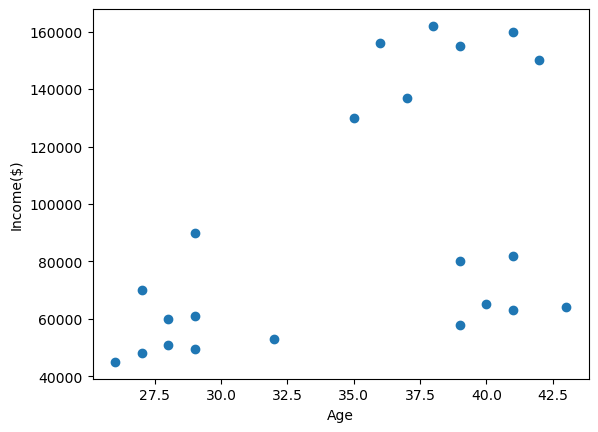

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])

/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
df['cluster'] = y_pred

In [12]:
df

,Name,Age,Income($),Cluster,cluster
0,Rob,27,70000,2,2
1,Michael,29,90000,2,2
2,Mohan,29,61000,0,0
3,Ismail,28,60000,0,0
4,Kory,42,150000,1,1
5,Gautam,39,155000,1,1
6,David,41,160000,1,1
7,Andrea,38,162000,1,1
8,Brad,36,156000,1,1
9,Angelina,35,130000,1,1


In [13]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

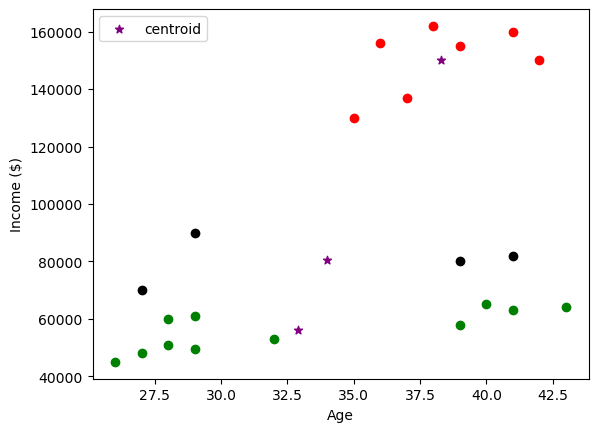

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Preprocessing using min max scaler

In [16]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [17]:
df.head()

,Name,Age,Income($),Cluster,cluster
0,Rob,0.058824,0.213675,2,2
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


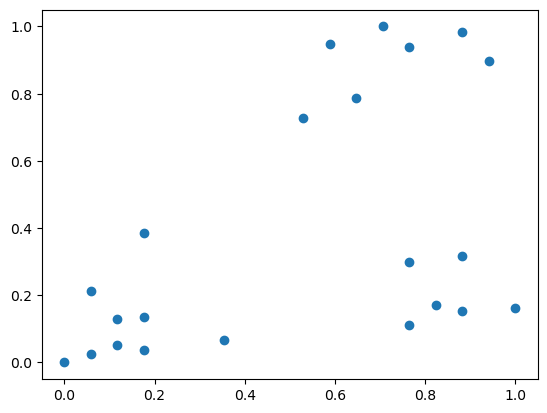

In [18]:
plt.scatter(df.Age,df['Income($)'])

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [20]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Cluster,cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


In [21]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

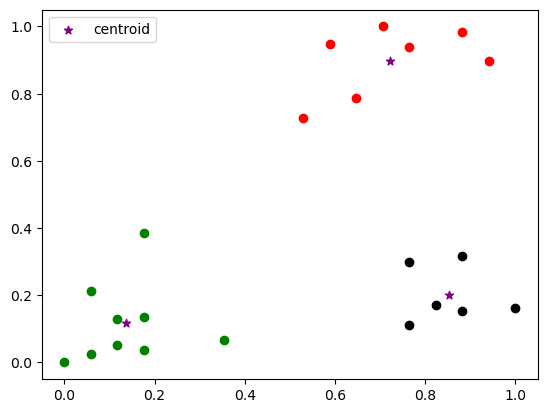

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

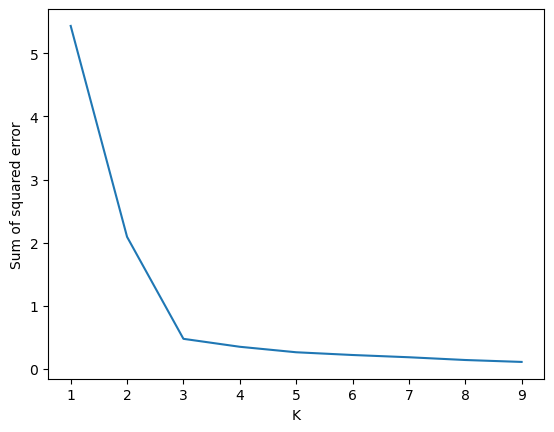

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [32]:
df

,Name,Age,Income($),Cluster,cluster,db
0,Rob,0.058824,0.213675,2,0,0
1,Michael,0.176471,0.384615,2,0,0
2,Mohan,0.176471,0.136752,0,0,0
3,Ismail,0.117647,0.128205,0,0,0
4,Kory,0.941176,0.897436,1,1,0
5,Gautam,0.764706,0.940171,1,1,0
6,David,0.882353,0.982906,1,1,0
7,Andrea,0.705882,1.000000,1,1,0
8,Brad,0.588235,0.948718,1,1,0
9,Angelina,0.529412,0.726496,1,1,0


# DBSCAN


In [42]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=20,min_samples=5)
y_pred2 = db.fit_predict(df[['Age','Income($)']])

In [43]:
df['db'] = y_pred2

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predicted,y_pred2))

0.4090909090909091


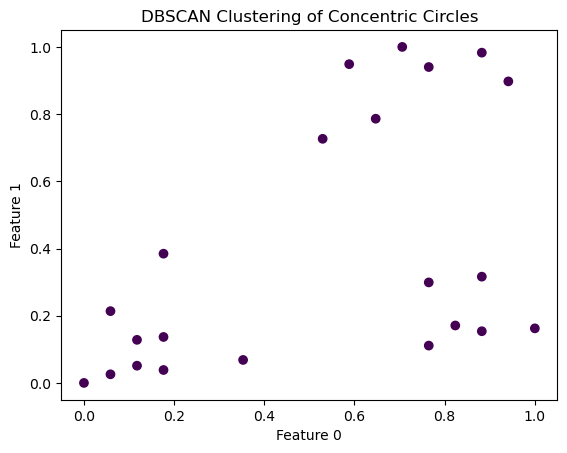

In [45]:
# Apply DBSCAN to the dataset

# Plotting
plt.scatter(df['Age'],df['Income($)'],c=y_pred2, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

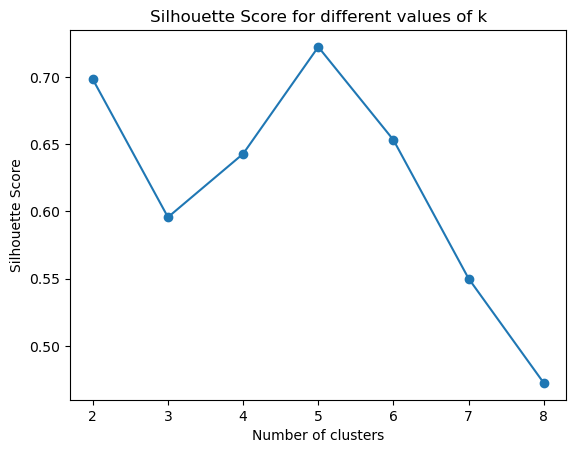

In [46]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Range of clusters to try
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# List to store silhouette scores
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.show()
